<center>
<h1> Python股票数据分析</h1>
<hr style="height:4px;border:true;color:#333;background-color:#1974D2;" />
<h2>Chihao Zhang</h2>
<h3>zhangchihao11@outlook.com<h3>
<h3>November 2017</h3>
</center>

# 引言

* Python 是 Guido van Rossum 在1989年圣诞节期间，为了打发无聊的圣诞节而编写的一个编程语言。

    * Guido 给 Python 的定位是 **优雅**、**明确**、**简单**。

* Python 为我们提供了非常完善的基础代码库。 除此之外， Python 还有大量第三方库。
* 近年来，Python 由于上手容易，语法简洁，在机器学习和数据挖掘领域受到越来越多的关注。

<center>
<img src="./figs/mlpl.png">
</center>
<li id="f1">Source: https://www.indeed.com/jobtrends/ [↩](#a1)</li>  

# 报告提纲

1. Python基础
2. Python 常用库
2. 双均线策略
3. 回测策略——JoinQuant为例



# Python 基础
* Python  是一门面向对象，大小写敏感，隐式类型 (变量不需要声明类型) 的编程语言。
* Python 目前流行的版本为2.x 版本和 3.x 版本。2.x 和 3.x 版本不完全兼容。目前大量的代码和库都是基于 2.x 的，但是越来越多的第三方库也开始支持 3.x。今天我们介绍的是 2.x 版本。
* 推荐工具 文本编辑器 (VS code, notepad++, sublime text etc.) + ipython (调试） + ipython notebook （可视化）

# 获取帮助
* `help(<object>)`: 获取帮助文档.
* `dir()`: 显示对象 (object) 的所有方法 (method).
* `<object>.__doc__`: 显示对象的文档.

In [3]:
# Help on int object
help(abs)

Help on built-in function abs in module __builtin__:

abs(...)
    abs(number) -> number
    
    Return the absolute value of the argument.



In [6]:
abs.__doc__

'abs(number) -> number\n\nReturn the absolute value of the argument.'

In [7]:
dir(abs)

['__call__',
 '__class__',
 '__cmp__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

# 语法
* **代码块**: Python 的代码块通过缩进 (indent) 定义, 用冒号开始。
* **注释**:
    * 单行注释 `#`
    * 多行注释 `""" XXX """ `
* **运算符**: 
    * 赋值 `=`, `+=`, `-=`
    * 比较 `<`, `>`, `==`

In [13]:
# 代码示例
myvar = 3
myvar += 2
myvar -= 1
print myvar
"""
这里是多行注释。
字符串也支持加法预算。
"""
mystring = "Hello"
mystring += " world!"
print mystring
# 交换两个变量的值
myvar, mystring = mystring, myvar
print "Now mystring = ", mystring
print "Now myvar = ", myvar

4
Hello world!
Now mystring =  4
Now myvar =  Hello world!


# 数据类型
Python 内置数据类型:
* 列表 (list): 有序集合，元素类型可以不一致，可以随时添加和删除其中的元素。
* 元组 (tuple): 有序集合，和 list 类似, 初始化后**不能修改**。
* 字典 (dictionary): 无序集合，，使用键-值（key-value）存储，具有极快的查找速度。
* 集合 (set): 是一组key的集合，但不存储value。由于key**不能重复**，所以，在set中，没有重复的key。

In [21]:
# 列表
sample = [1, ["another", "list"], ("a", "tuple")]
mylist = ["List item 1", 2, 3.14]
mylist[0] = "List item 1 again" # 改变list中的第一个元素，注意index是从0开始计数的
mylist[-1] = 3.21 # 改变最后一个元素
# 字典
mydict = {"Key 1": "Value 1", 2: 3, "pi": 3.14}
mydict["pi"] = 3.15 # 改变字典中的值
# 元组
mytuple = (1, 2, 3)
print "# elements of my list:", len(mylist) # 元素个数
print "# elements of my dictionary:", len(mydict) 
print "# elements of my tuple:", len(mytuple)

# elements of my list: 3
# elements of my dictionary: 3
# elements of my tuple: 3


In [41]:
# 索引 (index) 和切片 (slice)
mylist = ["List item 1", 2, 3.14]
# 所有元素
print(mylist[:])

['List item 1', 2, 3.14]


In [42]:
# 前两个元素，起始索引默认为0
print mylist[:2]

['List item 1', 2]


In [43]:
# 最后两个元素
print  mylist[-2:]

[2, 3.14]


In [38]:
# range(start, end, [step) 生成序列
mylist = range(1, 10)

In [37]:
help(range)

Help on built-in function range in module __builtin__:

range(...)
    range(stop) -> list of integers
    range(start, stop[, step]) -> list of integers
    
    Return a list containing an arithmetic progression of integers.
    range(i, j) returns [i, i+1, i+2, ..., j-1]; start (!) defaults to 0.
    When step is given, it specifies the increment (or decrement).
    For example, range(4) returns [0, 1, 2, 3].  The end point is omitted!
    These are exactly the valid indices for a list of 4 elements.



In [36]:
print "mylist: ", mylist
# 选取奇数元素
print "Odd element: ", mylist[::2]
# 选取偶数元素
print "Even element: ", mylist[1::2]

mylist:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Odd element:  [1, 3, 5, 7, 9]
Even element:  [2, 4, 6, 8]


## 打印和字符串
* 字符串使用**单引号或者双引号**。多行字符串使用三个单引号。
``` python
""" This is a mulitline
    string."""
```
* 格式化字符串，与C语言类似。。

In [48]:
print 'Age: %d. Gender: %s' % (25, True) # 用 % 隔开 元组
print "pi = %.2f" % 3.1415

Age: 25. Gender: True
pi = 3.14


- `%d` 整数, `%f` 浮点数, `%s` 字符串, `%x` 十六进制整数


# 流控制语句 (Flow control statements)
流控制语句包括 `if`, `for` 和 `while`。没有 `switch`语句。
``` python
rangelist = range(10)
for number in rangelist:
    if number in (3, 4, 7, 9):
        break # 跳出循环
    elif number == 2:
        print number
    else:
        continue # 进行下一次迭代
while rangelist[1] == 1:
    pass
```

# 函数
``` python
def passing_example(a_list, an_int=2, a_string="A default string"):
    a_list.append("A new item")
    an_int = 4
    return a_list, an_int, a_string
```
* **声明:** 函数通过关键词 `def` 声明， 依次写出函数名、括号、括号中的参数和冒号`:`
    * 位置参数
    * 关键字参数: 必须在位置参数后面
* **函数体**： 在缩进块中编写函数体
* **返回值**： 函数的返回值用 `return`, 返回元组 (tuple)
* **匿名函数**: 方便地定义简单的函数。

In [4]:
# 匿名函数
funcvar = lambda x: x + 1
print funcvar(1)
# an_int 和 a_string 是可选参数
def passing_example(a_list, an_int=2, a_string="A default string"):
    a_list.append("A new item")
    an_int = 4
    return a_list, an_int, a_string

2


In [5]:
my_list = [1, 2, 3]
my_int = 10
print passing_example(my_list, my_int)

([1, 2, 3, 'A new item'], 4, 'A default string')


# 面向对象编程: 类 (class)
面向对象最重要的概念就是类（Class）和实例（Instance），必须牢记类是抽象的模板，比如Student类，而实例是根据类创建出来的一个个具体的“对象”，每个对象都拥有相同的方法，但各自的数据可能不同。

<center>
<img src="./figs/classes_instances.png">
</center>

In [30]:
class MyClass(object):
    common = 10  # common 是类的一个共享参数
    def __init__(self, var):
        """
        进行类的实例化
        """
        self.myvariable = var + 1
    def myfunction(self, arg1, arg2):
        """
        这是类的一个方法 (method)。
        参数self代表的是类的实例
        """
        return self.myvariable
classinstance = MyClass(1) # 实例化
print classinstance.myfunction(1, 2) # 方法通过 instance.method_name() 调用

2


In [21]:
classinstance = MyClass(1)
classinstance2 = MyClass(2)
# 改变实例的
classinstance.common = 50
print classinstance.common
print classinstance2.common

50
5


In [20]:
MyClass.common = 5
classinstance = MyClass()
classinstance2 = MyClass()
print classinstance.common
print classinstance2.common

5
5


- 安装包 (library).
``` shell
# pip
pip install [pakage name]
# anaconda
conda install [package name]
```
- 需要安装包管理器 (pip, conda etc)

# Numpy 简介
NumPy的全名为Numeric Python，是一个开源的Python科学计算库，它包括：
- 一个强大的N维数组对象ndrray；
- 比较成熟的（广播）函数库；
- 用于整合C/C++和Fortran代码的工具包；
- 实用的线性代数、傅里叶变换和随机数生成函数
- 能够像在matlab中一样进行方便的矩阵运算

In [ ]:
import numpy as np
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

In [3]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

(array([5, 6, 7, 8]), (4,))
(array([[5, 6, 7, 8]]), (1, 4))


# Pandas 简介
Pandas最初被作为金融数据分析工具而开发出来:
- pandas为时间序列分析提供了很好的支持
- Pandas的名称来自于面板数据（panel data）和python数据分析（data analysis)。

# Pandas中的数据结构
- **Series**：一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近，其区别是：List中的元素可以是不同的数据类型，而Array和Series中则只允许存储相同的数据类型，这样可以更有效的使用内存，提高运算效率。
    - **Time-Series**：以时间为索引的Series。

- **DataFrame**：二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。以下的内容主要以DataFrame为主。

In [10]:
import pandas as pd
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df.head()

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


# 导入数据

In [2]:
import pandas as pd
# 从csv文件导入
stock_df1 = pd.read_csv('test-payh.csv') # import csv as
# 从xlsx文件导入
stock_df2 = pd.read_excel('test-payh.xlsx')
stock_df2.head()

,代码,名称,时间,开盘价,收盘价,最高价,最低价,成交量,成交金额
0,SZ000001,平安银行,2015-09-28,10.56,10.53,10.59,10.43,19908727,2.091862e+08
1,SZ000001,平安银行,2015-09-29,10.45,10.38,10.56,10.32,33360356,3.476123e+08
2,SZ000001,平安银行,2015-09-30,10.40,10.49,10.59,10.39,36465973,3.832302e+08
3,SZ000001,平安银行,2015-10-08,10.85,10.70,10.89,10.70,49407085,5.338061e+08
4,SZ000001,平安银行,2015-10-09,10.75,10.90,10.95,10.72,47461206,5.163105e+08


# 双均线策略

# 双均线策略
通过建立 `m` 天移动平均线，`n` 天移动平均 (move average) 线。 
* `m` > `n`
* 买入信号: 短期均线高于长期日均线，并且超过 SD 个点位
* 卖出信号： 不满足买入信号的所有情况

In [83]:
import pandas as pd
# 从csv文件导入
df = pd.read_csv('test-payh.csv') # import csv as
df.columns = ['symbol', 'name', 'date', 'open', 'close', 'high', 'low', 'volume', 'value']
# 计算滑动平均
mv5 = df.close.rolling(window=5).meanprint plot_buy_chance()
mv30 = df.close.rolling(window=30).mean()
# 计算买入点位
SD = 0.05
is_buy = (mv5 - mv30) / mv30 > SD
buy_chance = is_buy.index[is_buy]
print "df shape:", df.shape
print "mv5: ", mv5.shape, "mv30:", mv30.shape
print mv5[:5]

Int64Index([ 29,  30,  31,  32,  33,  34,  35,  36, 435, 436, 437, 438, 439,
            440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
            453, 454, 472, 473, 474, 475, 476, 477],
           dtype='int64')
df shape: (488, 9)
mv5:  (488,) mv30: (488,)
0     NaN
1     NaN
2     NaN
3     NaN
4    10.6
Name: close, dtype: float64


In [89]:
plot_buy_chance = [buy_chance[0]]
for idx in range(1, len(buy_chance)):
    if buy_chance[idx] - buy_chance[idx-1] < 2:
        continue
    else:
        plot_buy_chance.append(buy_chance[idx])

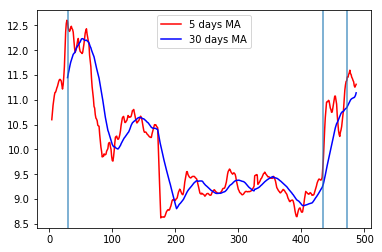

In [92]:
# plot move average line
import matplotlib.pyplot as plt 
# show figure inline
% matplotlib inline 
plt.plot(mv5, color='r', label='5 days MA')
plt.plot(mv30, color='b', label='30 days MA')
# plot buy chance
for idx in plot_buy_chance:
    plt.axvline(x=idx, alpha=.75) # plot vertical line
plt.legend()

# 回测策略——JoinQuant为例

# 参考资料
* [廖雪峰Python教程](https://www.liaoxuefeng.com/wiki/001374738125095c955c1e6d8bb493182103fac9270762a000)
*  Learning python in 10 minutes: https://www.stavros.io/tutorials/python/
* 《利用Python进行数据分析》，机械工业出版社, Wes McKinney, 唐学韬(译)
*  公开课：EDX [Introduction to Computer Science and Programming Using Python]
(https://www.edx.org/course/introduction-computer-science-mitx-6-00-1x-11)
* Learn pandas in 10 minutes: http://pandas.pydata.org/pandas-docs/stable/10min.html
* Package:
    - pandas: http://pandas.pydata.org/ 
    - numpy:  http://www.numpy.org/ 
    - matplotlib 画图
